Number of community members for each anime.
Objective:
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.
Dataset:
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

Tasks:

Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).
Handle missing values, if any.
Explore the dataset to understand its structure and attributes.

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.

Recommendation System:

Design a function to recommend anime based on cosine similarity.
Given a target anime, recommend a list of similar anime based on cosine similarity scores.
Experiment with different threshold values for similarity scores to adjust the recommendation list size.

Evaluation:

Split the dataset into training and testing sets.
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
Analyze the performance of the recommendation system and identify areas of improvement.



In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()

Saving anime.csv to anime (1).csv


In [5]:
Data = pd.read_csv("anime.csv")
Data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
Data[Data['name'] == 'Fullmetal Alchemist: Brotherhood']

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665


In [7]:
Data[Data['genre'] == 'Action']

,anime_id,name,genre,type,episodes,rating,members
798,33082,Kingsglaive: Final Fantasy XV,Action,Movie,1,7.83,15508
2697,33080,Brotherhood: Final Fantasy XV,Action,ONA,5,7.18,29445
3148,4810,Shinzou Ningen Casshern,Action,TV,35,7.07,2822
3368,5136,Flag Director&#039;s Edition: Issenman no Kufu...,Action,Movie,1,7.01,987
3616,4856,Fuuma no Kojirou: Fuuma Hanran-hen,Action,OVA,1,6.93,549
3651,4854,Fuuma no Kojirou: Yasha-hen,Action,OVA,6,6.92,819
3685,4855,Fuuma no Kojirou: Seiken Sensou-hen,Action,OVA,6,6.91,690
4597,29255,Ghost in the Shell Arise Episode: [.jp],Action,Special,1,6.68,2209
4670,3389,Bus Gamer,Action,TV,3,6.66,20550
4819,5583,Sonic: Night of the WereHog,Action,ONA,1,6.63,3424


In [8]:
Data['anime_id'].value_counts()

anime_id
32281    1
30404    1
26013    1
26017    1
15787    1
        ..
12455    1
28789    1
373      1
2089     1
26081    1
Name: count, Length: 12294, dtype: int64

In [9]:
Data['name']

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                            Gintama&#039;
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12294, dtype: object

In [10]:
Data['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64

In [11]:
Data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [12]:
Data[Data['rating'] == 10]

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.0,13


In [13]:
Data.sort_values(by=['rating'], ascending=False).head()

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

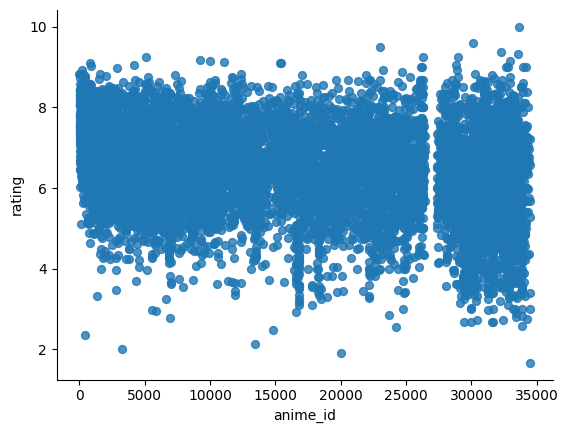

In [15]:

from matplotlib import pyplot as plt
Data.plot(kind='scatter', x='anime_id', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='Frequency'>

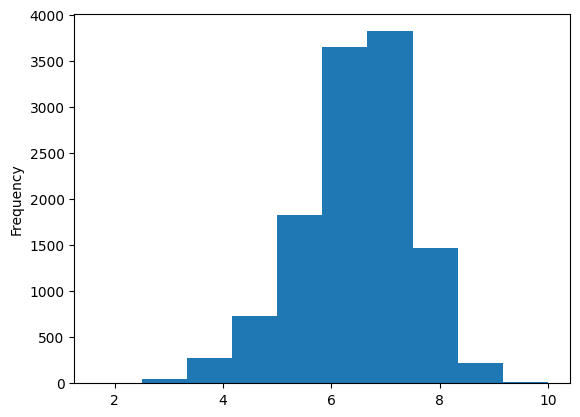

In [16]:
Data['rating'].plot.hist(x="anime_id", y="rating")

In [17]:
# prompt: tree map graph on books rating

import plotly.express as px

# Create the treemap graph
fig = px.treemap(Data, path=['anime_id'], values='rating',
                  color='anime_id', color_continuous_scale='viridis')

# Update the layout
fig.update_layout(title='Treemap of Anime Ratings')

# Show the graph
fig.show()

In [20]:
Data.columns = Data.columns.tolist()

In [21]:
Data.columns = ['anime_id','name','rating']

ValueError: Length mismatch: Expected axis has 7 elements, new values have 3 elements

In [ ]:
duplicate_users = Data['anime_id'].duplicated().sum()
print(f"Number of duplicate users: {duplicate_users}")

In [ ]:
Data = Data.drop_duplicates()

In [ ]:
Data['anime_id'].duplicated().sum()

In [ ]:
Data = Data.drop_duplicates(subset='anime_id')


In [ ]:
trans_data = new.pivot(index='anime_id',
                       columns='',
                       values='Book.Rating')

In [ ]:
trans_data.head()

In [ ]:
trans_data

In [ ]:
new_nan = trans_data.fillna(0, inplace=True)

Cosine based similarity

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
use_cos = 1 - pairwise_distances(trans_data.values,metric='cosine')

In [ ]:
use_cos

In [ ]:
np.fill_diagonal(use_cos, 0)

In [ ]:
use_cos_df = pd.DataFrame(use_cos)

In [ ]:
use_cos_df

In [ ]:
Data['User.ID'] = 'user'

In [ ]:
new.rename(columns={'User.ID': 'user'}, inplace=True)
new.head()

In [ ]:
use_cos_df.columns = new.user.unique()
use_cos_df.index = new.user.unique()

In [ ]:
use_cos_df

In [ ]:
use_cos_df.idxmax(axis=1)

In [ ]:
use_cos_df.idxmax(axis=1)[0:10]

In [ ]:
use_cos_df.iloc[:1]

In [ ]:
unique_values = use_cos_df.iloc[0].unique()
print(unique_values)

In [ ]:
unique_values = use_cos_df.iloc[1].unique()
print(unique_values)

In [ ]:
unique_values = use_cos_df.iloc[2].unique()
print(unique_values)

In [ ]:
use_cos_df.iloc[0:20, 0:20]

In [ ]:
use_cos_df.iloc[100:200, 100:200]